In [307]:
#import modules for the analysis environment
import os
import matplotlib.pyplot as plta
import pandas as pd
import numpy as np
import requests
import datetime
import ast
import gmaps
import datetime
# from config import gkey

#read cleaned csv file
df = pd.read_csv("Data/clean_data/clean_data.csv")
df.head()

,date,time,area,district,victim_age,victim_sex,victim_race,premise,address,location
0,07/06/2019,2355,N Hollywood,1591,99.0,Male,Unknown,STREET,GOODLAND AV,"(34.1371, -118.4062)"
1,07/06/2019,500,Foothill,1677,45.0,Male,White,STREET,GLENOAKS BL,"(34.2249, -118.3617)"
2,07/06/2019,1130,West Valley,1028,25.0,Male,Asian,STREET,SHERMAN WY,"(34.2012, -118.4989)"
3,07/06/2019,1415,Northeast,1153,29.0,Male,Unknown,STREET,LOS FELIZ BL,"(34.1081, -118.3078)"
4,07/06/2019,1230,Central,192,41.0,Male,Unknown,STREET,GRAND AV,"(34.0384, -118.2646)"


In [183]:
# Create DataFrame with the total counts of each ethnicity
victim_race_counts = pd.DataFrame(df['victim_race'].value_counts())
victim_race_counts

,victim_race
Hispanic,156131
White,101618
Unknown,60669
Black,58343
Asian,23383
Pacific Islander,442
American Indian,135


In [270]:
# Remove Unknown victims from DataFrame
updated_victim_race = victim_race_counts.loc[['Hispanic','White','Black',
                                              'Asian','Pacific Islander','American Indian'],
                                             ['victim_race']]
updated_victim_race

,victim_race
Hispanic,156131
White,101618
Black,58343
Asian,23383
Pacific Islander,442
American Indian,135


In [271]:
#Calculate the percentage of total crashes per ethinicity 
percent_victim_race = updated_victim_race["victim_race"]/updated_victim_race["victim_race"].sum()*100

# Add a new colum display the calculated percentage
updated_victim_race["crash_population"] = percent_victim_race
updated_victim_race

,victim_race,crash_population
Hispanic,156131,45.913860
White,101618,29.883077
Black,58343,17.157082
Asian,23383,6.876301
Pacific Islander,442,0.129980
American Indian,135,0.039700


In [303]:
# Display only the percentage of crashes per ethnicity
pct_race_df = pd.DataFrame(updated_victim_race["crash_population"])

# Format percentage calculations with two digits and percentage sign
# pct_race_df.style.format({"crash_population":"{:,.2f}%"})
pct_race_df

,crash_population
Hispanic,45.913860
White,29.883077
Black,17.157082
Asian,6.876301
Pacific Islander,0.129980
American Indian,0.039700


LA Population Composition by race
>- Hispanic: 48.2%
- White (non-hispanic): 28.5%
- Black: 9.0%
- Asian: 11.6%
- Pacific Islander: 0.2%
- American Indian: 0.4%
- Other: 0.6%

src: https://statisticalatlas.com/place/California/Los-Angeles/Race-and-Ethnicity 

In [301]:
ethn_dict = {"Hispanic":"48.2", 
             "White":"28.5", 
             "Black":"9.0", 
             "Asian":"11.6", 
             "Pacific Islander":"0.2", 
             "American Indian":"0.4"}

pct_race_df["LA_Population"] = pd.Series(ethn_dict)
multibar = pct_race_df.style.format({"crash_population":"{:,.2f}"})
multibar

,crash_population,LA_Population
Hispanic,45.91,48.2
White,29.88,28.5
Black,17.16,9.0
Asian,6.88,11.6
Pacific Islander,0.13,0.2
American Indian,0.04,0.4


In [375]:
pct_race_df

,crash_population
Hispanic,45.913860
White,29.883077
Black,17.157082
Asian,6.876301
Pacific Islander,0.129980
American Indian,0.039700


In [376]:
la_population = multibar[["LA_Population"]]

,crash_population,LA_Population
Hispanic,45.91,48.2
White,29.88,28.5
Black,17.16,9.0
Asian,6.88,11.6
Pacific Islander,0.13,0.2
American Indian,0.04,0.4


In [386]:
pd.DataFrame(multibar["LA_Population"])

TypeError: 'Styler' object is not subscriptable

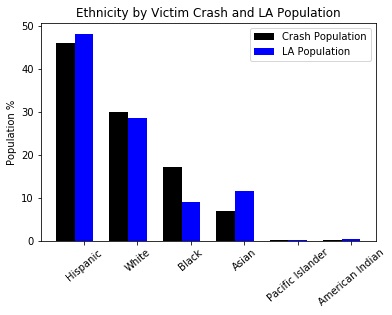

In [388]:
xaxis = ("H", "W", "B", "A", "P", "I")
crash_pop = (45.91, 29.88, 17.16, 6.88, 0.13, .04)
la_pop = (48.2, 28.5, 9, 11.6, .2, .4)

ind = np.arange(len(xaxis))
width = 0.35

plta.bar(ind - width/2, crash_pop, width, color="black", label="Crash Population")
plta.bar(ind + width/2, la_pop, width, color="b", label="LA Population")

plta.title("Ethnicity by Victim Crash and LA Population")
plta.ylabel("Population %")

plta.xticks(ind + width/2, ("Hispanic", "White", "Black", "Asian", "Pacific Islander", "American Indian"), rotation = 40)
plta.legend(loc="best")
plta.show()


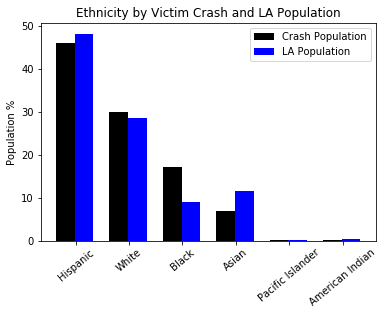

In [369]:
xaxis = ("H", "W", "B", "A", "P", "I")
crash_pop = (45.91, 29.88, 17.16, 6.88, 0.13, .04)
la_pop = (48.2, 28.5, 9, 11.6, .2, .4)

ind = np.arange(len(xaxis))
width = 0.35

plta.bar(ind - width/2, crash_pop, width, color="black", label="Crash Population")
plta.bar(ind + width/2, la_pop, width, color="b", label="LA Population")

plta.title("Ethnicity by Victim Crash and LA Population")
plta.ylabel("Population %")

plta.xticks(ind + width/20, ("Hispanic", "White", "Black", "Asian", "Pacific Islander", "American Indian"), rotation = 40)
plta.legend(loc="best")

# Use functions to label the percentages of changes
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
            label_position = 60
        else:
            label_position = -7
        plt.text(bar.get_x() + bar.get_width()/2., 
                 label_position,
                 "%d" % int(height)+"%",
                 color='white',
                 ha="center",va="bottom")

# Call functions to implement the function calls
autolabel(change_bar)

rects = fig.patches
labels=race_data.victim_race.tolist()
sum_labels = sum(labels)
perc_labels = [round(i/sum_labels*100,2) for i in labels]
perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]
for rect,label in zip(rects,perc_labels):
      fig.text(rect.get_x()+rect.get_width()/2,rect.get_height(),label,ha='center',va=
              'bottom')
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.spines['left'].set_visible(False)
fig.tick_params(axis='x', rotation=40)
plta.show()


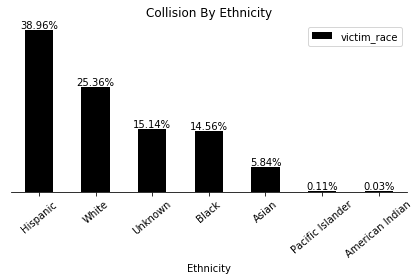

In [372]:
#get an overview of victim in race distribution
df['victim_race'].value_counts()
#bar graph
race_data = pd.DataFrame(df['victim_race'].value_counts())
fig = race_data.plot(kind='bar',color='black')
fig.set_xlabel('Ethnicity')
fig.set_yticks([])
fig.set_title('Collision By Ethnicity')
rects = fig.patches
labels=race_data.victim_race.tolist()
sum_labels = sum(labels)
perc_labels = [round(i/sum_labels*100,2) for i in labels]
perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]
for rect,label in zip(rects,perc_labels):
      fig.text(rect.get_x()+rect.get_width()/2,rect.get_height(),label,ha='center',va=
              'bottom')
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.spines['left'].set_visible(False)
fig.tick_params(axis='x', rotation=40)
#export
plta.tight_layout()
plta.savefig(os.path.join("figures","collision_by_ethnicity.png"))

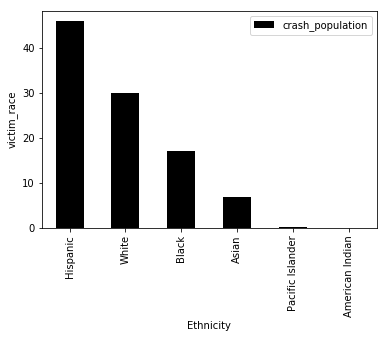

In [285]:
fig = pct_race_df.plot(kind="bar", color="black")
indices = ["Hispanic", "White", "Black", "Asian", "Pacific Islander", "American Indian"]
crash_population = pct_race_df["crash_population"]
LA_population = pct_race_df["LA_population"]

ax.bar()
fig.set_ylabel("victim_race")
fig.set_xlabel("Ethnicity")
fig.xticks = ("crash_population", "LA_population")

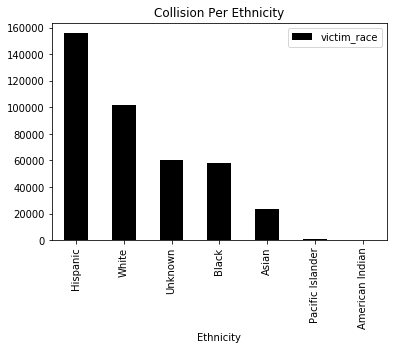

In [89]:
#get an overview of victim in race distribution
df["victim_race"].value_counts()
#bar graph
race_data = pd.DataFrame(df["victim_race"].value_counts())
fig = race_data.plot(kind="bar", color="black")
fig.set_xlabel('Ethnicity')
fig.set_title('Collision Per Ethnicity')
labels=race_data.victim_race.tolist()
sum_labels = sum(labels)
perc_labels = [round(i/sum_labels*100,2) for i in labels]
perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]


## Do Asian Crash More Than Average?

Text(0.5, 1.0, 'Collision Per Ethnicity')

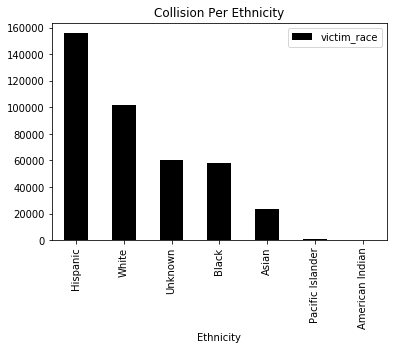

In [6]:
#get an overview of victim in race distribution
df["victim_race"].value_counts()
#bar graph
race_data = pd.DataFrame(df["victim_race"].value_counts())
fig = race_data.plot(kind="bar", color="black")
fig.set_xlabel('Ethnicity')
fig.set_title('Collision Per Ethnicity')
labels=race_data.victim_race.tolist()
sum_labels = sum(labels)
perc_labels = [round(i/sum_labels*100,2) for i in labels]
perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]


## How Many Car Accidents Per Month?

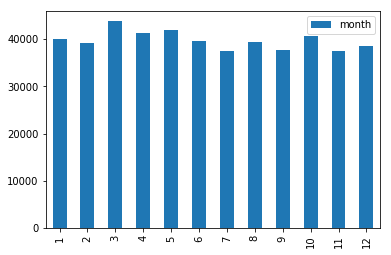

In [162]:
df1= df.copy()
# #map the month column to make it look neat
month_description = {1:'January', 2:'February', 3:'Unknown',4:'April', 5:'May', 6:'June',
                      7:'July', 8:'August', 9:'September',10:'October', 11:'November', 12:'December'}
df1.month = df.month.map(month_description)
df1.head()

month_data = pd.DataFrame(df.month.value_counts())
month_data= month_data.sort_index()
fig_month = month_data.plot(kind='bar')

## Calendar Heatmap

## Google Heatmap

In [86]:
!pip install gmaps

In [92]:
# gmaps.configure(api_key=gkey)
# location = df[['lat','lon']].astype(float)
# fig = gmaps.figure()

# layer = gmaps.symbol_layer(
#     location, fill_color='rgba(0, 150, 0, 0.4)',
#     stroke_color='rgba(0, 0, 150, 0.4)', scale=2)

# fig.add_layer(layer)
# fig

Figure(layout=FigureLayout(height='420px'))

## Age mean per Ethnicity